In [10]:
import sys
print(sys.executable)
import torch
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from navrep.envs.navreptrainenv import NavRepTrainEnv
from navrep.envs.roomgen import Room, split_room
from navrep.envs.navreptrainenv import NavRepTrainEnv
from navrep.envs.ianenv import IANEnv
rng = np.random.default_rng(12345)

/home/mads/miniconda3/envs/NavRepEnv/bin/python


In [11]:
room_h = 15
room_w = 12

main_room = np.array([[room_w,room_h],[-room_w,room_h],[-room_w,-room_h],[room_w,-room_h]])/2
r = Room.from_vert(main_room)

In [12]:
room_h = 45
room_w = 35

main_room = np.array([[room_w,room_h],[-room_w,room_h],[-room_w,-room_h],[room_w,-room_h]])/2
main_room = Room.from_vert(main_room)

axis = 1
corridor_w = 1.5
corridor_num = 5

rooms = []

rooms.append(main_room)
split = main_room.split_room(axis, corridor_w)
rooms=[r for r in split if r.get_area() > 1 and min(r.dim[0],r.dim[1]) > 1.5]


# Creates corridors
for i in range(corridor_num):
    axis = 1 - axis
    corridor_w *= 0.9
    num = len(rooms)
    for i in range(num):
        room = rooms.pop(0)
        split = room.split_room(axis, corridor_w)
        split = [r for r in split if r.get_area() > 2 and min(r.dim[0],r.dim[1]) > 1.5]
        rooms+= split if split else [room]
    r_idx = np.argsort([r.get_area() for r in rooms])#np.arange(len(rooms))
    rooms = [rooms[i] for i in r_idx]
    
# split big rooms
big_rooms = [i for i,r in enumerate(rooms) if r.get_area() > 30 and r.corridor_sides]

removed = []
while big_rooms:
    for i, br_idx in enumerate(big_rooms):
        room = rooms.pop(br_idx-i)
        axis = np.argmax(room.dim)
        #print(room.get_corridor_sides())
        if not any(axis == np.mod(room.get_corridor_sides(),2)):
            #print("flip")
            axis = 1 - axis
        for j in range(4):
            split = room.split_room(axis, 0)
            split_if = [r.get_area() > 2 and min(r.dim[0],r.dim[1]) > 1.5 for r in split]
            if all(split_if):
                rooms+= split
                break
            if j==3:
                removed += [room]
    big_rooms = [i for i,r in enumerate(rooms) if r.get_area() > 30 and r.corridor_sides]
rooms += removed

collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision


In [13]:
test = []
for room in rooms:
    for polygon in room.get_polygons():
        test.append([(point[0],point[1]) for point in polygon])
print(test)

[[(array([15.40289559, 21.1288336 ]), array([15.40289559, 22.5       ]))], [(array([15.40289559, 21.1288336 ]), array([15.40289559, 22.5       ])), (array([15.40289559, 22.5       ]), array([13.74573437, 22.5       ])), (array([13.74573437, 22.5       ]), array([13.74573437, 18.28095644])), (array([13.74573437, 18.28095644]), array([15.40289559, 18.28095644])), (array([15.40289559, 18.28095644]), array([15.40289559, 20.2288336 ]))], [(array([-1.35845421, 17.17097065]), array([-1.35845421, 19.19179466])), (array([-1.48204688, 14.48691805]), array([-1.35845421, 14.48691805]))], [(array([-1.35845421, 17.17097065]), array([-1.35845421, 19.19179466])), (array([-1.35845421, 19.19179466]), array([-3.24407445, 19.19179466])), (array([-3.24407445, 19.19179466]), array([-3.24407445, 14.48691805])), (array([-3.24407445, 14.48691805]), array([-2.38204688, 14.48691805])), (array([-1.48204688, 14.48691805]), array([-1.35845421, 14.48691805])), (array([-1.35845421, 14.48691805]), array([-1.35845421, 

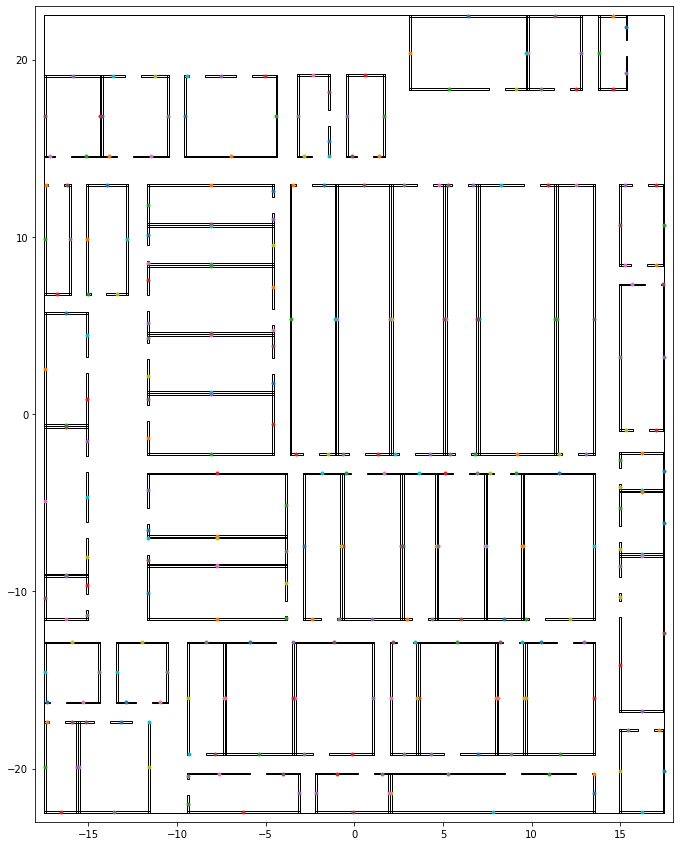

In [19]:
plot_rooms = [main_room]+rooms
fig, ax = plt.subplots(figsize=[15,15])
for r in plot_rooms:
    if r.door:
        poly, rect = r.get_polygons()
        for p in poly:
            polygon = Polygon(np.array(p), fill=False)
            #ax.add_patch(polygon)
            #ax.plot(r.door[0][0][:,0], r.door[0][0][:,1], '.')
        for p in rect:
            centre = np.mean(p, axis= 0)
            polygon = Polygon(np.array(p), fill=False)
            ax.add_patch(polygon)
            ax.plot(centre[0], centre[1], '.')
    else:
        polygon = Polygon(r.get_vert(), fill=False)
        ax.add_patch(polygon)
    
plt.xlim([-(room_w+1)/2,(room_w+1)/2])
plt.ylim([-(room_h+1)/2,(room_h+1)/2])
ax.set_aspect('equal', 'box')
plt.show()

In [15]:
test_room = Room(6,4,[1,1])

In [16]:
test_room.set_corridor_sides([1,2])
test_room.add_door()
test_room.add_door()
test_room.add_door()

[0.53820166 0.1       ]
[0.1 6. ]
[4.  0.1]
[0.1        1.63818312]
[0.1        0.69758457]
[0.1        1.86423231]
[2.56179834 0.1       ]


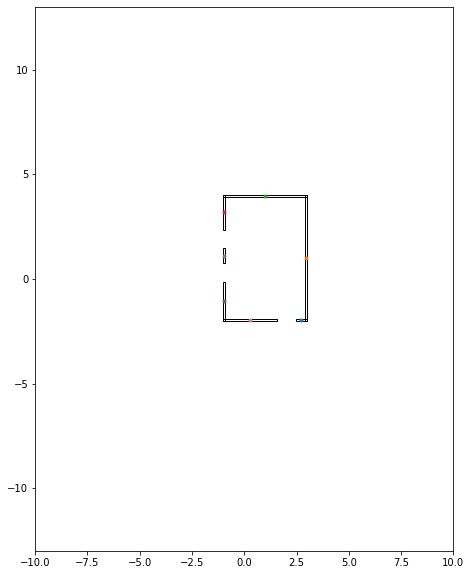

In [21]:
fig, ax = plt.subplots(figsize=[10,10])
poly, rect = test_room.get_polygons()
#for p in poly:
    #polygon = Polygon(p, fill=False)
    #ax.add_patch(polygon)
for r in rect:
    centre = np.mean(r, axis= 0)
    dim = np.max(r, axis=0)-np.min(r,axis=0)
    print(dim)
    polygon = Polygon(r, fill=False)
    ax.add_patch(polygon)
    ax.plot(centre[0], centre[1], '.')
    
plt.xlim([-10,10])
plt.ylim([-13,13])
ax.set_aspect('equal', 'box')
plt.show()

In [18]:
env = NavRepTrainEnv(silent=True, scenario='test', adaptive=False)
#env.soadrl_sim.human_num = 5
#env.soadrl_sim.num_walls = 5
#env.soadrl_sim.num_circles = 5
env.reset()
verts = env.soadrl_sim.obstacle_vertices
env.soadrl_sim.robot.py = 1

print(env.soadrl_sim.human_num,env.soadrl_sim.num_walls,env.soadrl_sim.num_circles)


[[(-1.1098221099286927, -1.5098221099286928), (-2.6901778900713076, -1.5098221099286928), (-2.6901778900713076, -3.090177890071308), (-1.1098221099286927, -3.090177890071308)], [(3.9126656815125958, 6.512665681512596), (2.887334318487405, 6.512665681512596), (2.887334318487405, 5.487334318487404), (3.9126656815125958, 5.487334318487404)], [(-4.724872921038567, 1.7751270789614337), (-6.675127078961434, 1.7751270789614337), (-6.675127078961434, -0.17512707896143354), (-4.724872921038567, -0.17512707896143354)], [(-5.513716646838131, -5.813716646838131), (-6.68628335316187, -5.813716646838131), (-6.68628335316187, -6.98628335316187), (-5.513716646838131, -6.98628335316187)], [(2.2192487092138746, -3.580751290786125), (0.7807512907861256, -3.580751290786125), (0.7807512907861256, -5.0192487092138744), (2.2192487092138746, -5.0192487092138744)], [(3.903296542356244, 1.003296542356244), (3.096703457643756, 1.003296542356244), (3.096703457643756, 0.19670345764375613), (3.903296542356244, 0.19

In [105]:
verts[0]

[(-1.1098221099286927, -1.5098221099286928),
 (-2.6901778900713076, -1.5098221099286928),
 (-2.6901778900713076, -3.090177890071308),
 (-1.1098221099286927, -3.090177890071308)]

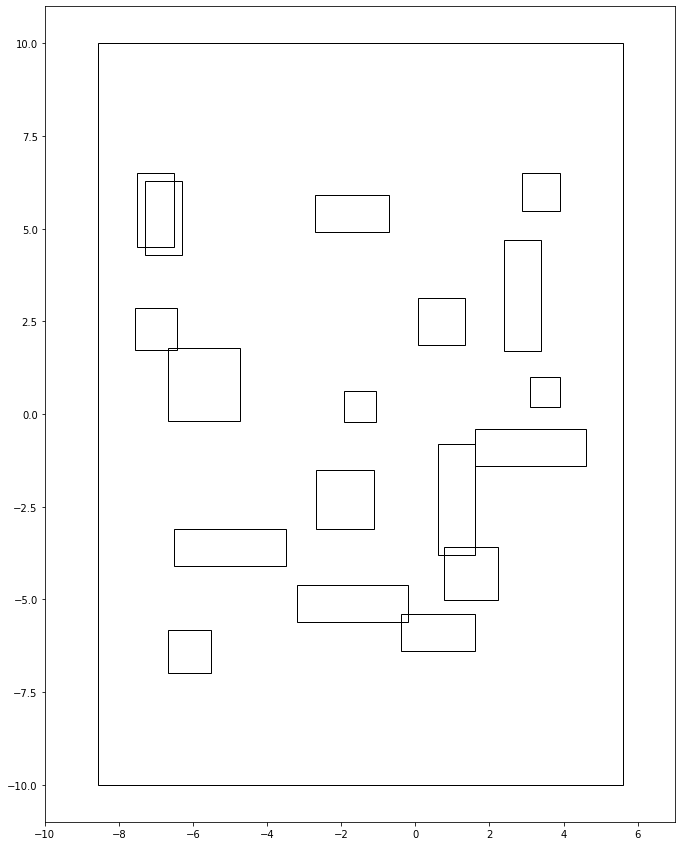

In [106]:
fig, ax = plt.subplots(figsize=[15,15])
for r in verts:
    polygon = Polygon(np.array(r), fill=False)
    ax.add_patch(polygon)

plt.xlim([-10,7])
plt.ylim([-11,11])
ax.set_aspect('equal', 'box')
plt.show()

Loading map definition from /home/mads/miniconda3/envs/NavRepEnv/lib/python3.6/site-packages/asl_pepper_2d_sim_maps/maps/asl_office_j.yaml
Map definition found. Loading map from /home/mads/miniconda3/envs/NavRepEnv/lib/python3.6/site-packages/asl_pepper_2d_sim_maps/maps/asl_office_j.pgm
Agentstate loaded from /home/mads/miniconda3/envs/NavRepEnv/lib/python3.6/site-packages/pyIA/scenarios/irosasl_office_j3.pickle
Loading map definition from /home/mads/miniconda3/envs/NavRepEnv/lib/python3.6/site-packages/asl_pepper_2d_sim_maps/maps/asl_office_j.yaml
Map definition found. Loading map from /home/mads/miniconda3/envs/NavRepEnv/lib/python3.6/site-packages/asl_pepper_2d_sim_maps/maps/asl_office_j.pgm
Creating Raytracer
Creating PyOmap
Creating PyRayMarching
Creating virtual Peppers
calculating TSDF
TSDF calculation: 3.3723918889882043s
0.1599999964237213
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


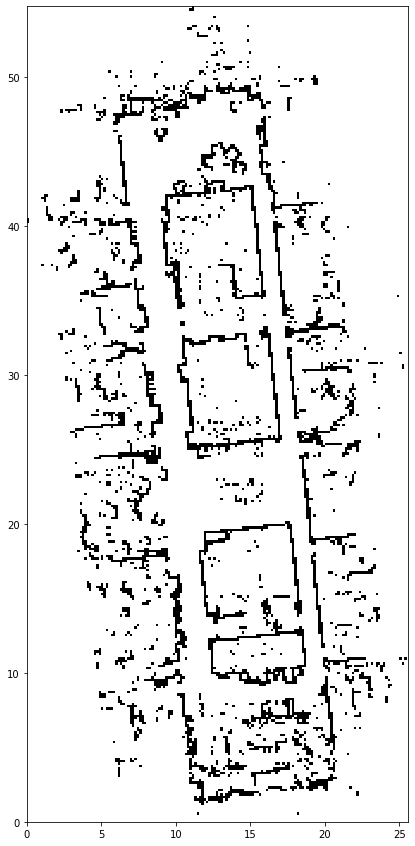

In [10]:
envIAN = IANEnv()
envIAN.reset()
map2d = envIAN.iarlenv.rlenv.coarse_map2d
a = map2d.occupancy()
print(map2d.resolution())
print(a.astype(int))
fig, ax = plt.subplots(figsize=[15,15])
ax.imshow(a.astype(int),cmap='Greys',interpolation='none', extent=np.array([0,a.shape[1],0,a.shape[0]])*map2d.resolution())
plt.show()

In [11]:
dir(map2d)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_occupancy',
 'as_closed_obst_vertices',
 'as_closed_obst_vertices_ij',
 'as_coarse_map2d',
 'as_occupied_points_ij',
 'as_sdf',
 'as_sdf_ij',
 'as_tsdf',
 'cdirection_in_field',
 'cset_occupancy',
 'cset_resolution',
 'dijkstra',
 'direction_in_field',
 'distance_transform_2d',
 'distance_transform_2d_ij',
 'empty_like',
 'fastmarch',
 'from_msg',
 'from_scan',
 'ij_to_xy',
 'is_inside_ij',
 'numpy_to_occupancy_grid_msg',
 'occupancy',
 'occupancy_T',
 'old_is_inside_ij',
 'old_render_agents_in_lidar',
 'old_xy_to_ij',
 'origin',
 'plot_contours',
 'render_agents_in_lidar',
 'render_agents_in_many_lidars',
 'resolution',
 'seri

In [104]:
rng = np.random.default_rng(12345)

class Room(object):
    def __init__(self, h, w, c):
        self.update_hwc(h,w,c)
        self.corridor_sides = []
        self.door = []
        self.door_w = 0.9
        self.wall_thickness = 0.1
    def update_hwc(self, h, w, c):
        self.dim = np.array([w,h])
        self.c = c
        
    @classmethod
    def from_vert(cls, vert):
        min_x, max_x = np.min(vert[:,0]),np.max(vert[:,0])
        min_y, max_y = np.min(vert[:,1]),np.max(vert[:,1])
        h = max_y - min_y
        w = max_x - min_x
        c = np.array([max_x+min_x,max_y+min_y])/2
        return cls(h,w,c)
    
    def get_vert(self):
        return self.c + np.array([[self.dim[0], self.dim[1]],[-self.dim[0],self.dim[1]],[-self.dim[0],-self.dim[1]],[self.dim[0],-self.dim[1]]])/2
    
    def get_area(self):
        return self.dim[0]*self.dim[1]
    
    def add_door(self, side=None):
        if side == None:
            s = rng.choice(self.corridor_sides)
        else:
            s = side
        if s == 0 or s == 2:
            axis = 1
        elif s == 1 or s == 3:
            axis = 0
        
        if s == 0 or s == 3:
            fact = 1
        elif s == 1 or s == 2:
            fact = -1
        door_point = np.zeros([2,2])
        door_point[:,axis] = self.c[axis] + fact*self.dim[axis]/2
        p = rng.beta(1,1)*(self.dim[1-axis]-self.door_w-self.wall_thickness*2) - (self.dim[1-axis]-self.door_w-self.wall_thickness*2)/2
        door_point[:,1-axis] = (self.c[1-axis] + p) + np.array([-self.door_w,self.door_w])/2
        door_point = door_point if s < 2  else np.flip(door_point,0) # ensure that order is correct relative to positive direction
        
        other_doors = [d for d in self.door if d[1]==s]
        
        collision = False
        for door in other_doors:
            #check if current door clashes with existing door NOT WORKING
            if any(door_point[:,1-axis] > np.min(door[0][:,1-axis])) and any(door_point[:,1-axis] < np.max(door[0][:,1-axis])):
                collision = True
                print("collision")
        
        if not collision:
            self.door.append((door_point,s))
        
        #      0
        #   -------
        #   |     |
        # 1 |     | 3
        #   |     |
        #   -------
        #      2
        
    def get_polygons(self):
        if len(self.door) < 1:
            return [self.get_vert()]
        else:
            polygon_list = []
            rectangle_list = []
            door_add = np.array([[0,-1],[1,0],[0,1],[-1,0]])*self.wall_thickness
            vert_add = np.array([[-1,-1],[1,-1],[1,1],[-1,1]])*self.wall_thickness
            verts = self.get_vert()
            verts_prime = verts+vert_add

            doors = self.door
            
            # sorting
            door_avg = np.array([np.mean(d[0], axis=0) for d in doors])-self.c
            first_vert_ang = np.arctan2(verts[0][1]-self.c[1], verts[0][0]-self.c[0])
            #print("first_vert_ang: ", first_vert_ang)
            sorted_door_idx = np.argsort(np.mod(np.arctan2(door_avg[:,1],door_avg[:,0])-first_vert_ang+np.pi*2,np.pi*2))
            #print("sorted index: ", sorted_door_idx)

            # create polygon 1
            cur_door_idx = sorted_door_idx[0]
            cur_door = doors[cur_door_idx]
            last_door = doors[sorted_door_idx[-1]]
            
            vert_base = np.concatenate([verts[last_door[1]+1:],verts[:cur_door[1]+1]])
            vert_base_prime = np.concatenate([verts_prime[last_door[1]+1:],verts_prime[:cur_door[1]+1]])
            
            vert_base = np.concatenate([last_door[0][0].reshape((1,-1)), vert_base, cur_door[0][1].reshape((1,-1))])
            vert_base_prime = np.concatenate([(last_door[0][0]+ door_add[last_door[1]]).reshape((1,-1)),
                                             vert_base_prime, (cur_door[0][1]+ door_add[cur_door[1]]).reshape((1,-1))])
            for j in range(vert_base.shape[0]-1):
                outer = vert_base[j:j+2].copy()
                outer_prime = vert_base_prime[j:j+2].copy()
                axis = np.argwhere(outer[0]==outer[1])
                inner = outer.copy()
                inner[:,axis] = outer_prime[:,axis]
                inner = np.flip(inner, 0)
                rectangle_list.append(np.concatenate([outer, inner]))

            vert_base_prime = np.flip(vert_base_prime,0)
            
            polygon_list.append(np.concatenate([vert_base, vert_base_prime]).copy())

            for i in range(len(sorted_door_idx)-1):
                cur_door = doors[sorted_door_idx[i]]
                next_door = doors[sorted_door_idx[i+1]]
                vert_base = verts[cur_door[1]+1:next_door[1]+1]
                vert_base_prime = verts_prime[cur_door[1]+1:next_door[1]+1]
                
                vert_base = np.concatenate([cur_door[0][0].reshape((1,-1)), vert_base, next_door[0][1].reshape((1,-1))])
                vert_base_prime = np.concatenate([(cur_door[0][0]+ door_add[cur_door[1]]).reshape((1,-1)),
                                             vert_base_prime, (next_door[0][1]+ door_add[next_door[1]]).reshape((1,-1))])
                for j in range(vert_base.shape[0]-1):
                    outer = vert_base[j:j+2].copy()
                    outer_prime = vert_base_prime[j:j+2].copy()
                    axis = np.argwhere(outer[0]==outer[1])
                    inner = outer.copy()
                    inner[:,axis] = outer_prime[:,axis]
                    inner = np.flip(inner, 0)
                    rectangle_list.append(np.concatenate([outer, inner]))
                
                vert_base_prime = np.flip(vert_base_prime,0)
                
                polygon_list.append(np.concatenate([vert_base, vert_base_prime]).copy())
            
        return polygon_list, rectangle_list
    
    def set_corridor_sides(self, l):
        l = set(l)
        self.corridor_sides = list(l)
        
    def get_corridor_sides(self):
        return self.corridor_sides

    def split_room(self, axis, corridor_w):
        min_, max_ = np.min(self.get_vert()[:,axis]),np.max(self.get_vert()[:,axis])
        split = rng.random()*(max_-min_)+min_
        split = rng.beta(1,1)*(max_-min_-corridor_w)+min_+corridor_w/2
        room1 = self.get_vert().copy()
        result = []
        room1[room1[:,axis]==min_,axis] = split+corridor_w/2
        room1 = Room.from_vert(room1)
        if axis == 0:
            side1 = 1
            side2 = 3
        else:
            side1 = 2
            side2 = 0
        if corridor_w < 0.1:
            corridor_sides1 = self.get_corridor_sides()
            if side1 in corridor_sides1:
                corridor_sides1.remove(side1)
            corridor_sides2 = self.get_corridor_sides()
            if side2 in corridor_sides2:
                corridor_sides2.remove(side2)
        else:
            corridor_sides1 = self.get_corridor_sides() + [side1]
            corridor_sides2 = self.get_corridor_sides() + [side2]
        
        room1.set_corridor_sides(corridor_sides1)
        room1.add_door()
        if rng.choice([True,False]):
            room1.add_door()
        
        room2 = self.get_vert().copy()
        room2[room2[:,axis]==max_,axis] = split-corridor_w/2
        room2 = Room.from_vert(room2)
        room2.set_corridor_sides(corridor_sides2)
        room2.add_door()
        if rng.choice([True,False]):
            room2.add_door()
        return [room1, room2]